In [1]:
import os
import pandas as pd
import missingno as msno


In [2]:
os.getcwd()

'/Users/alexanderheinz/Kurse/MLOps_Zoomcamp/mlops-zoomcamp_final_project/juptyter_notebooks'

In [12]:
data_path = "../data/data.csv"
df = pd.read_csv(data_path)

#df = pd.read_csv("./data/autoscout24-germany-dataset.csv")

In [16]:
df.size



3766185

In [14]:
df.shape(0)

TypeError: 'tuple' object is not callable

In [15]:
df.shape

(251079, 15)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                251079 non-null  int64  
 1   brand                     251079 non-null  object 
 2   model                     251079 non-null  object 
 3   color                     250913 non-null  object 
 4   registration_date         251075 non-null  object 
 5   year                      251079 non-null  object 
 6   price_in_euro             251079 non-null  object 
 7   power_kw                  250945 non-null  object 
 8   power_ps                  250950 non-null  object 
 9   transmission_type         251079 non-null  object 
 10  fuel_type                 251079 non-null  object 
 11  fuel_consumption_l_100km  224206 non-null  object 
 12  fuel_consumption_g_km     251079 non-null  object 
 13  mileage_in_km             250927 non-null  f

In [56]:
df.price_in_euro = pd.to_numeric(df.price_in_euro, errors = "coerce")

In [57]:
df.isna().sum()

Unnamed: 0                      0
brand                           0
model                           0
color                         166
registration_date               4
year                            0
price_in_euro                 199
power_kw                      134
power_ps                      129
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    26873
fuel_consumption_g_km           0
mileage_in_km                 152
offer_description               1
dtype: int64

In [58]:
df.fuel_consumption_g_km.unique()

array(['260 g/km', '- (g/km)', '225 g/km', ..., '67 g/km',
       '78 km Reichweite', '77 km Reichweite'], dtype=object)

<Axes: >

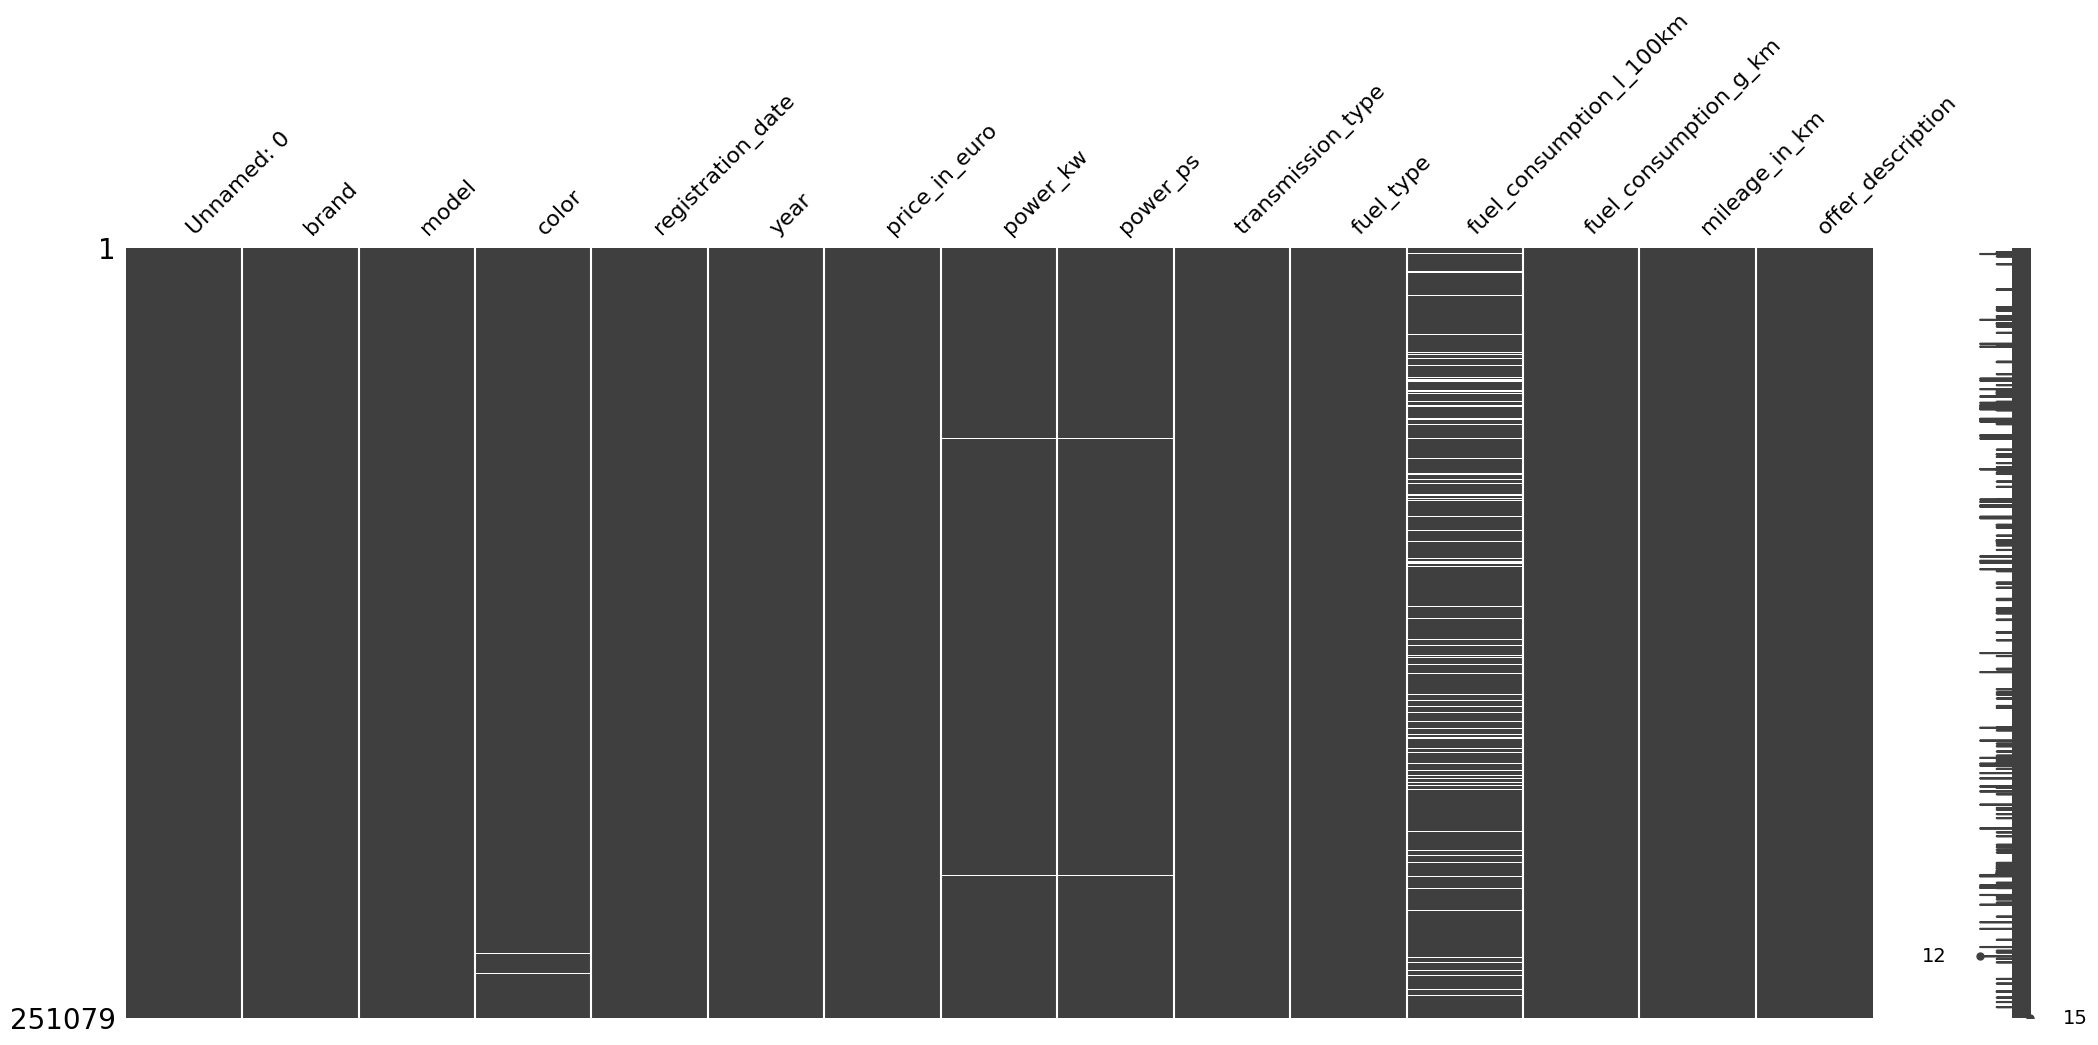

In [59]:
msno.matrix(df)

In [60]:
df.brand.unique()

array(['alfa-romeo', 'aston-martin', 'audi', 'bentley', 'bmw', 'cadillac',
       'chevrolet', 'chrysler', 'citroen', 'dacia', 'daewoo', 'daihatsu',
       'dodge', 'ferrari', 'fiat', 'ford', 'honda', 'hyundai', 'infiniti',
       'isuzu', 'jaguar', 'jeep', 'kia', 'lada', 'lamborghini', 'lancia',
       'land-rover', 'maserati', 'mazda', 'mercedes-benz', 'mini',
       'mitsubishi', 'nissan', 'opel', 'peugeot', 'porsche', 'proton',
       'renault', 'rover', 'saab', 'seat', 'skoda', 'smart', 'ssangyong',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

# check outcome

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [62]:
price_counts = df.price_in_euro.value_counts()

In [63]:
# Define price bins and labels
bins = [0, 100, 500, 1000, 5000, 10000, 50000, 100000, float('inf')]
labels = ['0', '100-500', '500-1,000', '1,000-5000', '5,000-10,000', '10,000-50,000', '50,000-100,000', '100,000+']
df['price_category'] = pd.cut(df['price_in_euro'], bins=bins, labels=labels, right=False)
df['price_category'] = df['price_category'].cat.add_categories(['NaN'])
df['price_category'].fillna('NaN', inplace=True)
# Ensure the categories are in the correct order
order = labels + ['NaN'] # df['price_category'].value_counts().index # for frequency


/var/folders/81/16mr_0gj603btxm2xxhl704c0000gn/T/ipykernel_1799/3032568681.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price_category'].fillna('NaN', inplace=True)


/var/folders/81/16mr_0gj603btxm2xxhl704c0000gn/T/ipykernel_1799/1554451856.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='price_category', palette='viridis', order=order)


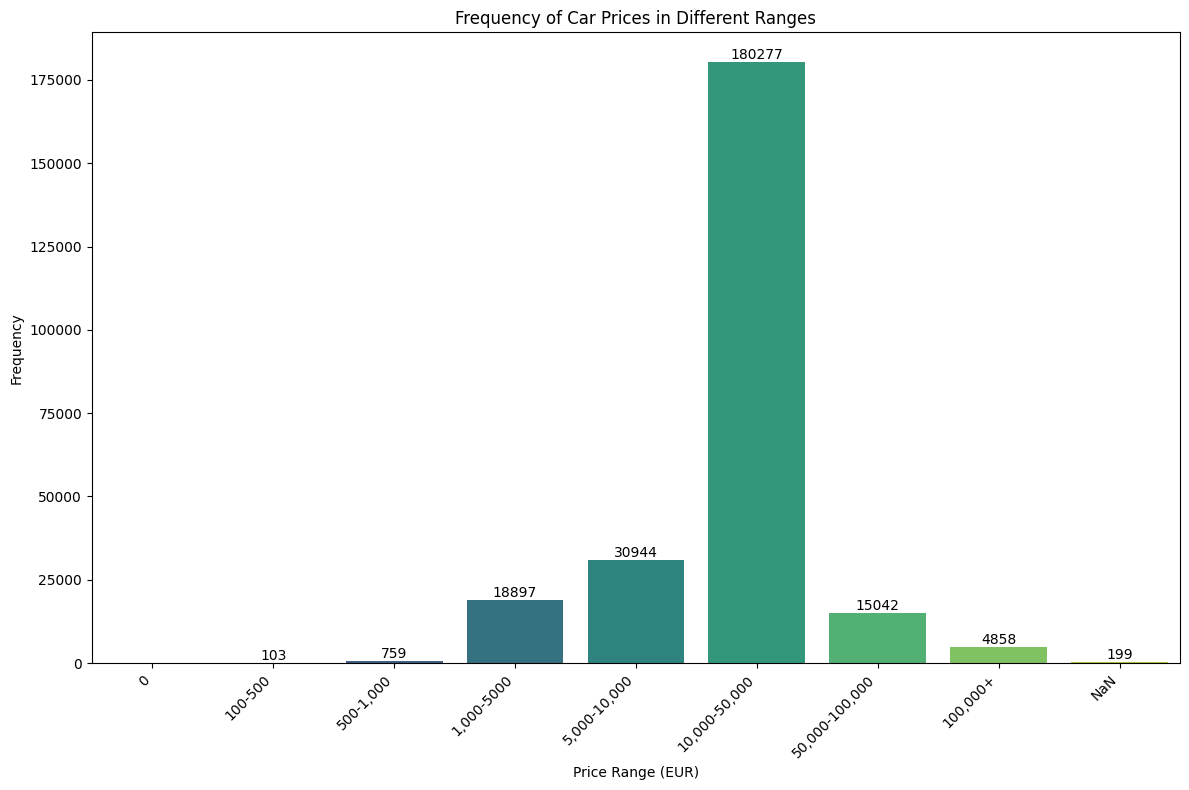

In [64]:
# Plot the frequency of each price category
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='price_category', palette='viridis', order=order)
plt.xlabel('Price Range (EUR)')
plt.ylabel('Frequency')
plt.title('Frequency of Car Prices in Different Ranges')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


# Add the exact count on top of each bar
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


In [65]:
df.brand.value_counts()

brand
volkswagen       33281
mercedes-benz    27226
audi             21161
opel             20388
bmw              19810
ford             18790
skoda            14039
seat             11949
renault           8694
toyota            8228
hyundai           6989
peugeot           5848
kia               5734
fiat              5039
mini              4295
mazda             4211
volvo             4164
citroen           4083
porsche           3958
nissan            3784
dacia             3367
land-rover        3073
jeep              1749
smart             1643
alfa-romeo        1437
jaguar            1398
mitsubishi         934
honda              785
maserati           698
dodge              669
ferrari            590
bentley            541
lamborghini        361
ssangyong          342
aston-martin       277
saab               233
isuzu              206
daihatsu           204
chevrolet          191
lada               191
cadillac           157
infiniti           112
lancia             105
daewo

/var/folders/81/16mr_0gj603btxm2xxhl704c0000gn/T/ipykernel_1799/3139227045.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='brand', palette='viridis', order=df['brand'].value_counts().index)


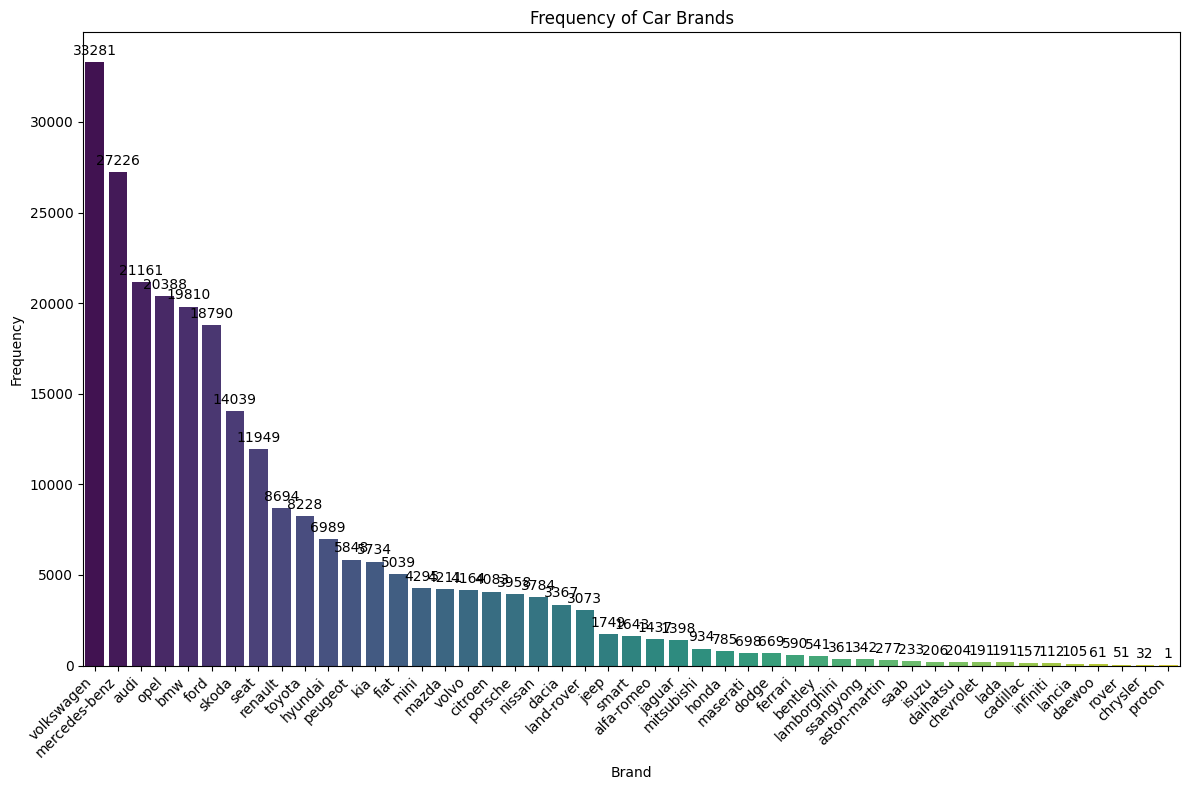

In [66]:

# Plot the frequency of each brand
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='brand', palette='viridis', order=df['brand'].value_counts().index)
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.title('Frequency of Car Brands')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


# Add the exact count on top of each bar
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', 
                xytext=(0, 3), textcoords='offset points')

# Show the plot
plt.show()

In [67]:

# Function to check for valid years
def is_valid_year(value):
    return value.isdigit() and len(value) == 4

# Replace invalid years with NaN
df['year'] = df['year'].apply(lambda x: x if is_valid_year(x) else np.nan)




In [68]:

# unique_values = df['mileage_in_km'].unique()
# unique_values_list = unique_values.tolist()


In [69]:

# Function to check for valid power entries
def is_valid_power(value):
    if pd.isna(value):  # Check if the value is NaN
        return False
    # Check if the value is a number or a valid power entry
    return value.replace(',', '.').replace('.', '', 1).isdigit() or value.isdigit()

# Replace invalid power entries with NaN
df['power_kw'] = df['power_kw'].apply(lambda x: x if is_valid_power(x) else np.nan)

df['power_kw'] = df['power_kw'].str.replace(',', '.').astype(float)


In [70]:
df['power_ps'] = df['power_ps'].apply(lambda x: x if is_valid_power(x) else np.nan)
df['power_ps'] = df['power_ps'].str.replace(',', '.').astype(float)


In [71]:
# Define categories
bins = [0, 100, 200, float('inf')]
labels = ['Low Power (0-136 PS)', 'Medium Power (137-272 PS)', 'High Power (273 PS and above)']
df['power_category'] = pd.cut(df['power_kw'], bins=bins, labels=labels, right=False)


/var/folders/81/16mr_0gj603btxm2xxhl704c0000gn/T/ipykernel_1799/755360958.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='power_category', palette='viridis', order=df['power_category'].value_counts().index)


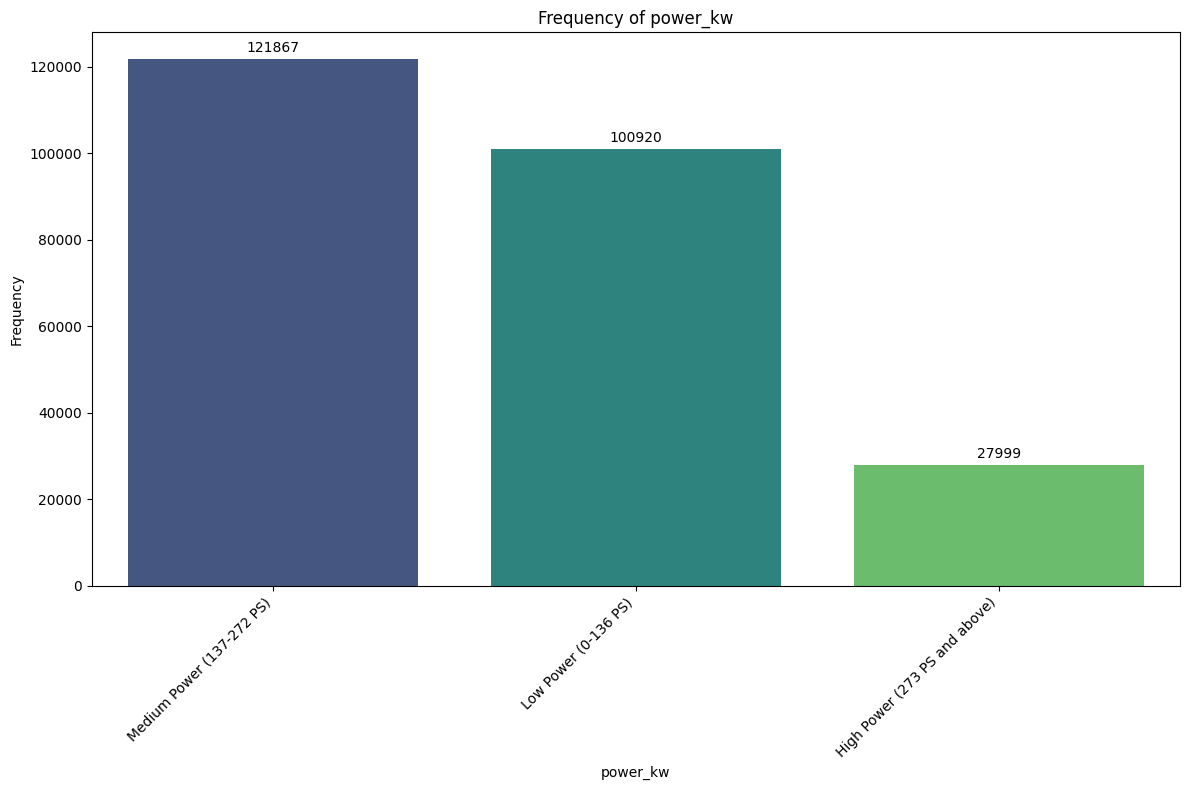

In [72]:

# Plot the frequency of each brand
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='power_category', palette='viridis', order=df['power_category'].value_counts().index)
plt.xlabel('power_kw')
plt.ylabel('Frequency')
plt.title('Frequency of power_kw')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


# Add the exact count on top of each bar
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', 
                xytext=(0, 3), textcoords='offset points')

# Show the plot
plt.show()

In [73]:
# Assuming df is your DataFrame
unique_values = df['fuel_consumption_g_km'].unique()
unique_values_list = unique_values.tolist()
print(unique_values_list)

['260 g/km', '- (g/km)', '225 g/km', '210 g/km', '320 g/km', '265 g/km', '220 g/km', '125 g/km', '278 g/km', '200 g/km', '271 g/km', '195 g/km', '202 g/km', '1 g/km', '192 g/km', '283 g/km', '286 g/km', '211 g/km', '194 g/km', '218 g/km', '201 g/km', '175 g/km', '204 g/km', '212 g/km', '196 g/km', '287 g/km', '208 g/km', '154 g/km', '206 g/km', '296 g/km', '199 g/km', '160 g/km', '295 g/km', '207 g/km', '165 g/km', '159 g/km', '231 g/km', '209 g/km', '162 g/km', '157 g/km', '205 g/km', '215 g/km', '275 g/km', '221 g/km', '179 g/km', '273 g/km', '155 g/km', '223 g/km', '0 g/km', '198 g/km', '180 g/km', '288 g/km', '217 g/km', '224 g/km', '183 g/km', '190 g/km', '289 g/km', '153 g/km', '181 g/km', '187 g/km', '138 g/km', '186 g/km', '189 g/km', '145 g/km', '126 g/km', '119 g/km', '176 g/km', '140 g/km', '134 g/km', '130 g/km', '156 g/km', '139 g/km', '379 g/km', '122 g/km', '129 g/km', '149 g/km', '90 g/km', '177 g/km', '114 g/km', '142 g/km', '152 g/km', '133 g/km', '124 g/km', '104 g/k

In [74]:
# Create columns for CO2 emissions and Reichweite
df['co2_emissions_g_km'] = df['fuel_consumption_g_km'].str.extract(r'(\d+)\s*g/km')
df['reichweite_km'] = df['fuel_consumption_g_km'].str.extract(r'(\d+)\s*km Reichweite')

# Convert extracted values to numeric (and handle errors)
df['co2_emissions_g_km'] = pd.to_numeric(df['co2_emissions_g_km'], errors='coerce')
df['reichweite_km'] = pd.to_numeric(df['reichweite_km'], errors='coerce')




In [75]:
df['power_ps'] = pd.to_numeric(df['power_ps'], errors='coerce')
df['mileage_in_km'] = pd.to_numeric(df['mileage_in_km'], errors='coerce')
df['year'] = pd.to_numeric(df['year'], errors='coerce')



In [76]:
df.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description,price_category,power_category,co2_emissions_g_km,reichweite_km
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995.0,1300.0,148.0,201.0,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB,"1,000-5000",Medium Power (137-272 PS),260.0,NaN
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995.0,24900.0,191.0,260.0,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA","10,000-50,000",Medium Power (137-272 PS),NaN,NaN
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995.0,5900.0,110.0,150.0,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916,"5,000-10,000",Medium Power (137-272 PS),NaN,NaN
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995.0,4900.0,110.0,150.0,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L,"1,000-5000",Medium Power (137-272 PS),225.0,NaN
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996.0,17950.0,132.0,179.0,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !","10,000-50,000",Medium Power (137-272 PS),NaN,NaN


# Modeling

In [77]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [78]:
df = df.dropna(subset=['price_in_euro'])

# Remove extreme prices (e.g., keeping prices below the 95th percentile)
price_threshold = df['price_in_euro'].quantile(0.95)
df = df[df['price_in_euro'] <= price_threshold]

X = df.drop(columns=['price_in_euro', "Unnamed: 0", "fuel_consumption_l_100km", "fuel_consumption_g_km", "co2_emissions_g_km",	"reichweite_km", "fuel_type", "power_kw", "offer_description", "price_category", "power_category", "registration_date"])
y = df['price_in_euro']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [79]:
# Identify categorical and numerical columns
categorical_cols = ['brand', 'model', 'transmission_type']#, #'fuel_type'] 'color',
numerical_cols = ['year', 
                  'power_ps', 
                  'mileage_in_km']
                  #, 'co2_emissions_g_km', 'reichweite_km']
                  #'fuel_consumption_l_100km', 'fuel_consumption_g_km', 
                  #'power_kw', 

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])


params = {"random_state": 42,
          "missing": np.nan}


# Create a pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(**params))
])

In [80]:
model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'power_ps',
                                                   'mileage_in_km']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['brand', 'model', 'color',
                                                   'transmission_type'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=N...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [32]:
from pathlib import Path
import mlflow
import mlflow.xgboost
tags = {'version': 'v0.1', 'type': 'demo'}
description = 'A first attempt on the full dataset using XGBRegressor'

experiment_name = "autoscout_logging"

# Set the tracking URI to the SQLite database
mlflow.set_tracking_uri("sqlite:///mlflow.db")

experiment_id = mlflow.create_experiment(name = experiment_name,
                         tags = tags,
                         artifact_location=Path.cwd().joinpath('mlruns').as_uri())


mlflow.set_experiment(experiment_id)

2024/07/20 20:57:49 INFO mlflow.tracking.fluent: Experiment with name '1' does not exist. Creating a new experiment.


<Experiment: artifact_location='/Users/alexanderheinz/Kurse/MLOps_Zoomcamp/mlops-zoomcamp_final_project/mlruns/2', creation_time=1721501869614, experiment_id='2', last_update_time=1721501869614, lifecycle_stage='active', name='1', tags={}>

In [33]:


# Start an MLflow experiment
with mlflow.start_run(run_name='Main Run', description=description) as run:
    run_id = run.info.run_id
    mlflow.set_tag("developer", "Alexander Heinz")
    mlflow.log_params(params)

    model_pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = model_pipeline.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    rmse = np.sqrt(mse)
    # Log parameters and metrics
    mlflow.log_param("model", "XGBRegressor")
    mlflow.log_param("data-path", data_path)
    mlflow.log_param("random_state", 42)
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2", r2)

    # Save the model
    # joblib.dump(model_pipeline, 'car_price_model.pkl')

Mean Squared Error: 18132122.458913557
RMSE: 4258.182999697589
R² Score: 0.8874569824546634


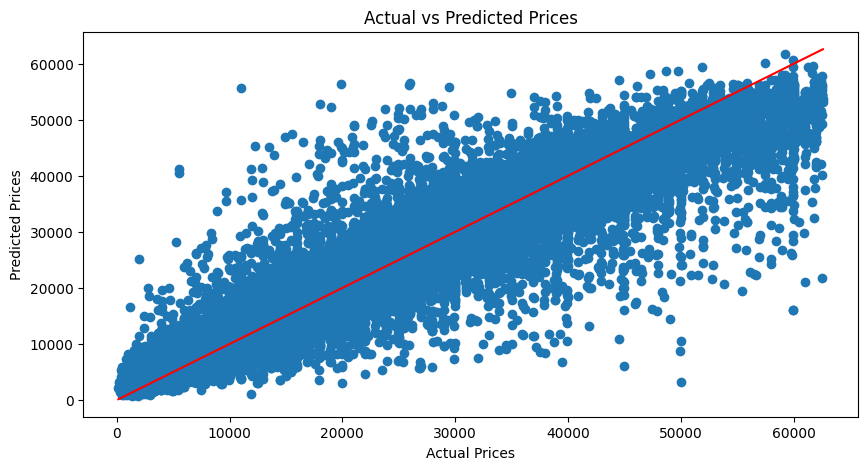

In [34]:
print(f'Mean Squared Error: {mse}')
print(f'RMSE: {rmse}')

print(f'R² Score: {r2}')

# Visualize predictions
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()


# using bayesian hyperparameter optimization

- also get a validation set from a different dataset for testing purposes

In [35]:
val_path = "./data/autoscout24-germany-dataset.csv"
df_val = pd.read_csv(val_path)
df_val["model"] = df_val["make"]+" "+df_val["model"]
# Mapping dictionary
column_mapping = {
    'mileage': 'mileage_in_km',
    'make': 'brand',
    'model': 'model',
    'fuel': 'fuel_type',
    'gear': 'transmission_type',
    #'offerType': 'offer_description',
    'price': 'price_in_euro',
    'hp': 'power_ps',
    'year': 'year'
}

df_val.rename(columns=column_mapping, inplace=True)
common_columns = df.columns.intersection(df_val.columns)
df = df[common_columns]
df_val = df_val[common_columns]
df_val.head()

,brand,model,year,price_in_euro,power_ps,transmission_type,fuel_type,mileage_in_km
0,BMW,BMW 316,2011,6800,116.0,Manual,Diesel,235000
1,Volkswagen,Volkswagen Golf,2011,6877,122.0,Manual,Gasoline,92800
2,SEAT,SEAT Exeo,2011,6900,160.0,Manual,Gasoline,149300
3,Renault,Renault Megane,2011,6950,110.0,Manual,Gasoline,96200
4,Peugeot,Peugeot 308,2011,6950,156.0,Manual,Gasoline,156000


In [81]:
target = 'price_in_euro'
# y_train = df[target].values
y_val = df_val[target].values

X_val = df_val.drop(columns=['price_in_euro'])


In [82]:
import xgboost as xgb
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope

In [83]:
X_train

,brand,model,color,year,power_ps,transmission_type,mileage_in_km
121162,mercedes-benz,Mercedes-Benz E 220,blue,2018.0,194.0,Automatic,97645.0
138952,opel,Opel Vivaro,silver,2003.0,120.0,Manual,200000.0
187678,seat,SEAT Ibiza,white,2022.0,110.0,Manual,1030.0
162058,peugeot,Peugeot 5008,white,2019.0,131.0,Automatic,68000.0
203208,skoda,Skoda Karoq,white,2023.0,150.0,Automatic,7.0
...,...,...,...,...,...,...,...
128351,mercedes-benz,Mercedes-Benz A 180,violet,2022.0,116.0,Automatic,12889.0
110388,mercedes-benz,Mercedes-Benz C 180,blue,2011.0,156.0,Automatic,76300.0
140912,opel,Opel Meriva,silver,2008.0,125.0,Automatic,108432.0
155861,opel,Opel Corsa,orange,2021.0,101.0,Automatic,19900.0


In [85]:
experiment_id

'3'

In [90]:
mlflow.get_tracking_uri()

'sqlite:///mlflow.db'

In [95]:
from pathlib import Path
import mlflow
import mlflow.xgboost
tags = {'version': 'v0.2', 'type': 'demo'}
description = 'A first attempt on parameter tuning'

experiment_name = "autoscout_tuning"

# Set the tracking URI to the SQLite database
mlflow.set_tracking_uri("sqlite:///mlflow.db")

# experiment_id = mlflow.create_experiment(name = experiment_name,
#                          tags = tags,
#                          artifact_location=Path.cwd().joinpath('mlruns').as_uri())


mlflow.set_experiment(experiment_id)

<Experiment: artifact_location='/Users/alexanderheinz/Kurse/MLOps_Zoomcamp/mlops-zoomcamp_final_project/mlruns/4', creation_time=1721501942051, experiment_id='4', last_update_time=1721501942051, lifecycle_stage='active', name='3', tags={}>

In [96]:
description = "using hyperopt to hyperoptimize hyperparameters"

def objective(params):
    with mlflow.start_run(run_name='Hyperparameter Optimization', description=description) as run:
        mlflow.set_tag("model", "XGBRegressor")
        mlflow.log_params(params)

        # Create a pipeline
        model_pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('model', XGBRegressor(**params))
        ])  
        
        model_pipeline.fit(X_train, y_train)
        y_pred = model_pipeline.predict(X_test)

        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        # rmse = mean_squared_error(y_val, y_pred, squared=False)

        # r2 = r2_score(y_test, y_pred)

        rmse = np.sqrt(mse)
        # Log parameters and metrics
        mlflow.log_param("model", "XGBRegressor")
        mlflow.log_param("data-path", data_path)
        mlflow.log_param("random_state", 42)
        mlflow.log_metric("mse", mse)
        mlflow.log_metric("rmse", rmse)
        # mlflow.log_metric("r2", r2)

    return {'loss': rmse, 'status': STATUS_OK}

In [97]:
search_space = {
    'max_depth': scope.int(hp.quniform('max_depth', 4, 100, 1)),
    'learning_rate': hp.loguniform('learning_rate', -3, 0),
    'reg_alpha': hp.loguniform('reg_alpha', -5, -1),
    'reg_lambda': hp.loguniform('reg_lambda', -6, -1),
    'min_child_weight': hp.loguniform('min_child_weight', -1, 3)
}


In [98]:
try:
    best_result = fmin(
        fn=objective,
        space=search_space,
        algo=tpe.suggest,
        max_evals=25,
        trials=Trials()
    )
except Exception as e:
    print(e)

100%|██████████| 25/25 [44:56<00:00, 107.85s/trial, best loss: 3947.167939821112]  


In [99]:
y_pred_val = model_pipeline.predict(X_val)


ValueError: columns are missing: {'color'}